## DONT JUST RULL ALL CELLS - \[%%bash CELL] can be really slow

### This file decribes how to get scrape a working csv-file from wikinews.org 

- to get a working file execute all cells. The individual steps are described througout the notebook. WHen creating files and moving files they don't always show up until you reopen vscode.

- The cell below uses the terminal(%%bash) to start the web-scraper by navigating into the scrapy-project folder and create the file in the scrapy-project folder. This can be slow the first time by design, but afterwards we have cached the results. The scripts run by the terminal is finished when the cell gives some text output. After all this the file has to be moved


In [1]:
import pandas as pd # Read csv
import numpy as np  # LinAlg
import os           # Read filepaths
import shutil       # Move files
import string       # strong lists of chars

In [2]:
%%bash
cd ..
cd Code
cd Wiki_News_Scrapy
scrapy crawl wiki -o wiki_news_raw.csv

Couldn't find program: 'bash'


In [3]:
import sys
sys.path.append('../Code')

from move_module import move # import move func defined locally


# file_name = 'wiki_news_raw.csv'
file_name = 'wiki_news_raw_backup.csv'

src = '../Code/Wiki_News_Scrapy/'
dst = '../Data_sample/'

# moving file
move(file_name, src, dst)

# create dataframe
df = pd.read_csv(dst+file_name)

# show info
print("\nThe scraped dataframe contains %s articles with %s columns (not counting index)" % ( len(df), len(df.columns) ) )
df.head()

File [wiki_news_raw_backup.csv] already in dst

The scraped dataframe contains 3680 articles with 8 columns (not counting index)


,article_url,categories,content,publish_date,scraped_at,source_urls,sources_domain_urls,title
0,https://en.wikinews.org/wiki/Ma_Ying-jeou_beco...,"May 20, 2008,Translated news,Published,Archive...","\r\n Today, Ma Ying-jeou was sworn in as the...","May 20, 2008",2020-04-22,http://www.radioaustralia.net.au/news/stories/...,"https://en.wikipedia.org/wiki/Radio_Australia,...",Ma Ying-jeou becomes President of Republic of ...
1,https://en.wikinews.org/wiki/Violence_cuts_sho...,"December 15, 2005,Published,Archived,Haiti,Pol...",\r\n Protests against the president of the Dom...,"December 15, 2005",2020-04-22,http://seattlepi.nwsource.com/national/1102AP_...,"/wiki/Associated_Press,https://en.wikipedia.or...",Violence cuts short visit of Dominican Republi...
2,https://en.wikinews.org/wiki/Wikinews_Shorts:_...,"February 20, 2014,Wikinews Shorts,Published,Ar...",A compilation of brief news reports for .\r\n...,"February 20, 2014",2020-04-22,http://www.cnn.com/2014/02/19/world/europe/ukr...,"/wiki/CNN,/wiki/The_Guardian,/wiki/NBC_News,/w...","Wikinews Shorts: February 20, 2014"
3,https://en.wikinews.org/wiki/Violence_continue...,"September 5, 2006,Published,AutoArchived,Polit...","\r\n Iraq witnessed more violence, with more ...","September 5, 2006",2020-04-22,http://news.bbc.co.uk/go/rss/-/2/hi/middle_eas...,"/wiki/BBC_News_Online,/wiki/Fox_News,/wiki/BBC...","Violence continues in Baghdad, suspected al-Qu..."
4,https://en.wikinews.org/wiki/Wyclef_Jean_consi...,"July 28, 2010,Haiti,United States,Politics and...","\r\n Following months of rumours, musician t...","July 28, 2010",2020-04-22,http://www.guardian.co.uk/world/2010/jul/27/wy...,"/wiki/The_Guardian,https://en.wikipedia.org/wi...",Wyclef Jean considering standing for president...


### Show what data is dirty by showing starting char

In [5]:
# get first 
fst_char_series = df['title'].str.slice(0, 1)

# Count amount of articles with igen starting char
fst_char_series.value_counts()

U    763
S    514
P    412
T    384
N    372
W    322
M    306
R    273
O    239
V     89
"      2
F      1
       1
'      1
G      1
Name: title, dtype: int64

We can see that we get a few rouge articles with the wrong starting letter. This is down to some inconsistencies between our spiders scraping logic and a few of wikinews' article structuring. The rouge ones with " and ' might just be articles with the correct starting letter so lets explore that.


### Remove all that is 

In [5]:
# defining correct start letters 'a'-'j'
our_chars_set = set("ABCDEFGHIJKLMNOPRSTUVWZABCDEFGHIJKLMNOPRSTUVWZ"[12 % 23:12 % 23+10])

# get valid chars
ascii_uppercase = string.ascii_uppercase

# finding index of rogue articles
rouge_index = []

# Remove or update
for idx, title in enumerate(df['title']):
    # get first char
    fst_char = title[0].upper()

    # check and replace
    if fst_char not in ascii_uppercase:
        # remove " or '
        if fst_char in ["'", '"']:
            df.loc[idx, 'title'] = ( df.loc[idx, 'title'].replace(fst_char, '') ).capitalize()
        # All other only remove fst starting char
        else:
            df.loc[idx, 'title'] = ( df.loc[idx, 'title'][1:] ).capitalize()
    # get idx for titles not in our set
    elif fst_char not in our_chars_set:
        rouge_index.append(idx)

# remove rouge
df.drop(rouge_index)

,article_url,categories,content,publish_date,scraped_at,source_urls,sources_domain_urls,title
0,https://en.wikinews.org/wiki/Ma_Ying-jeou_beco...,"May 20, 2008,Translated news,Published,Archive...","\n Today, Ma Ying-jeou was sworn in as the ...","May 20, 2008",2020-04-22,http://www.radioaustralia.net.au/news/stories/...,"https://en.wikipedia.org/wiki/Radio_Australia,...",Ma Ying-jeou becomes President of Republic of ...
1,https://en.wikinews.org/wiki/Violence_cuts_sho...,"December 15, 2005,Published,Archived,Haiti,Pol...",\n Protests against the president of the Domin...,"December 15, 2005",2020-04-22,http://seattlepi.nwsource.com/national/1102AP_...,"/wiki/Associated_Press,https://en.wikipedia.or...",Violence cuts short visit of Dominican Republi...
2,https://en.wikinews.org/wiki/Wikinews_Shorts:_...,"February 20, 2014,Wikinews Shorts,Published,Ar...",A compilation of brief news reports for .\n \...,"February 20, 2014",2020-04-22,http://www.cnn.com/2014/02/19/world/europe/ukr...,"/wiki/CNN,/wiki/The_Guardian,/wiki/NBC_News,/w...","Wikinews Shorts: February 20, 2014"
3,https://en.wikinews.org/wiki/Violence_continue...,"September 5, 2006,Published,AutoArchived,Polit...","\n Iraq witnessed more violence, with more th...","September 5, 2006",2020-04-22,http://news.bbc.co.uk/go/rss/-/2/hi/middle_eas...,"/wiki/BBC_News_Online,/wiki/Fox_News,/wiki/BBC...","Violence continues in Baghdad, suspected al-Qu..."
4,https://en.wikinews.org/wiki/Wyclef_Jean_consi...,"July 28, 2010,Haiti,United States,Politics and...","\n Following months of rumours, musician tod...","July 28, 2010",2020-04-22,http://www.guardian.co.uk/world/2010/jul/27/wy...,"/wiki/The_Guardian,https://en.wikipedia.org/wi...",Wyclef Jean considering standing for president...
...,...,...,...,...,...,...,...,...
3675,https://en.wikinews.org/wiki/Madagascar_leader...,"December 21, 2009,Madagascar,Published,Archive...","\n Madagascar 's leader, Andry Rajoelina , ha...","December 21, 2009",2020-04-23,http://www1.voanews.com/english/news/africa/Ma...,"/wiki/VOA_News,/wiki/BBC_News_Online",Madagascar leader names army officer as prime ...
3676,https://en.wikinews.org/wiki/Macedonian_police...,"November 7, 2007,North Macedonia,Published,Arc...",\n At least four members of an armed criminal ...,"November 7, 2007",2020-04-23,"http://www.mia.com.mk/portal/page?_pageid=113,...","https://en.wikipedia.org/wiki/MIA,https://en.w...",Macedonian police kill four militants in mount...
3677,https://en.wikinews.org/wiki/Macedonian_police...,"October 25, 2007,North Macedonia,Published,Arc...",\n A Macedonian police officer was killed an...,"October 25, 2007",2020-04-23,http://www.dnevnik.com.mk/?ItemID=E33918970CD5...,"https://en.wikipedia.org/wiki/dnevnik.com.mk,/...",Macedonian policeman killed in attack near Kosovo
3678,https://en.wikinews.org/wiki/Ma_Ying-jeou_wins...,"March 22, 2008,Asia,Politics and conflicts,Tai...","\n \n Ma Ying-jeou , former Mayor of Taipei, h...","March 22, 2008",2020-04-23,http://vote2008-3.nat.gov.tw/zh-tw/T1/s0000000...,https://en.wikipedia.org/wiki/Central_Election...,Ma Ying-jeou wins 2008 Taiwan presidential ele...


### Now lets get some basic inside into the dataset

,article_url,categories,content,publish_date,scraped_at,source_urls,sources_domain_urls,title
count,3680,3680,3678,3671,3680,3464,3470,3680
unique,3680,3665,3678,2105,2,3464,3207,3680
missing,0,0,2,9,0,216,210,0


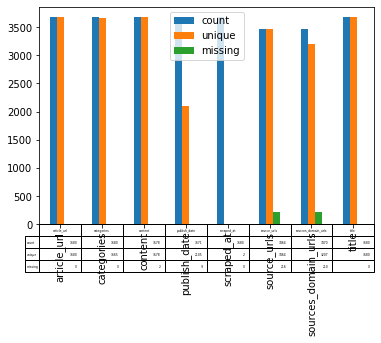

In [6]:
# Calculating number: count, unique for each column
describe_df = df.describe(include=[np.object]).head(2)

# Calculating number: NaN for each column
nan_df = df.isna().sum()

# Create one df
describe_df.loc['missing'] = nan_df
# plot
describe_df.T.plot(kind='bar',  table=True)
describe_df # just display numbers

# Abnove is code for guide - below is code for exploration

In [7]:
# df.loc[selection criteria, columns I want] = value
df.loc[fst_char_series.isin(fst_char_dict)]

NameError: name 'fst_char_dict' is not defined

We can see that we get a few rouge articles with the wrong starting letter. This is down to some inconsistencies between our spiders scraping logic and a few of wikinews' article structuring. The rouge ones with " and ' might just be articles with the correct starting letter so lets explore that.


In [8]:
print( df['title'].loc[df['title'].str.slice(0, 1).str.lower() == "'"] )
print( df['title'].loc[df['title'].str.slice(0, 1).str.lower() == '"'] )

Series([], Name: title, dtype: object)
Series([], Name: title, dtype: object)


We can see that all articles with " or ' has a valid starting letter wich means we can format the titles such that they can be included

In [9]:
df.loc[859, 'title']

"Magazine refutes us president donald trump's twitter claim he was nominated , 'person of the year'"

In [10]:
# create dict
fst_char_dict = dict(fst_char_series.value_counts())

for char in fst_char_dict:
    print(char)

U
S
P
T
N
W
M
R
O
V
"
 
'
G
F


In [11]:

df['title'].loc[df['title'].str.slice(0, 1).str.lower() == "f"]

1961    Fred Thompson accused of being a "mole" for Ni...
Name: title, dtype: object

In [12]:
group_nr = 12 # <- change to get correct article set
"ABCDEFGHIJKLMNOPRSTUVWZABCDEFGHIJKLMNOPRSTUVWZ"[group_nr % 23:group_nr % 23+10]

'MNOPRSTUVW'

In [13]:
df['title'].str.slice(0, 1) = '"'

SyntaxError: can't assign to function call (<ipython-input-13-7ee60926cdf7>, line 1)

In [14]:
df['title']

0       Ma Ying-jeou becomes President of Republic of ...
1       Violence cuts short visit of Dominican Republi...
2                      Wikinews Shorts: February 20, 2014
3       Violence continues in Baghdad, suspected al-Qu...
4       Wyclef Jean considering standing for president...
                              ...                        
3675    Madagascar leader names army officer as prime ...
3676    Macedonian police kill four militants in mount...
3677    Macedonian policeman killed in attack near Kosovo
3678    Ma Ying-jeou wins 2008 Taiwan presidential ele...
3679    Macedonia says compromise with Greece over nam...
Name: title, Length: 3680, dtype: object

In [15]:
df.iloc[3603, 0]

'https://en.wikinews.org/wiki/Mass_graves_of_thousands_of_ISIL_victims_found,_UN_reports'

In [16]:
fig, ax = plt.subplots(1, 1)

In [163]: d = count_unique_df.T

In [164]: ax.get_xaxis().set_visible(False)   # Hide Ticks

In [165]: d.plot(table=True, ax=ax)

NameError: name 'plt' is not defined

In [17]:
a.append(b, ignore_index=True)


NameError: name 'a' is not defined

In [18]:
df.isna().sum()

article_url              0
categories               0
content                  2
publish_date             9
scraped_at               0
source_urls            216
sources_domain_urls    210
title                    0
dtype: int64

In [19]:
k = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
k

,lab,val
0,A,10
1,B,30
2,C,20


In [20]:
ax = k.plot.bar(x='val', y='lab', rot=0)

TypeError: no numeric data to plot